# Проверка гипотез

Отделом маркетинга подготовлено несколько гипотез для увеличения выручки.<br>
Задачи
 - Приоритизировать гипотезы, 
 - Запустить A/B-тест, 
 - Проанализировать результаты.

Для анализа A/B теста проанализируем динамику следующих параметров:
 - кумулятивной выручки по группам;
 - кумулятивного среднего чека по группам;
 - относительного изменения кумулятивного среднего чека группы B к группе А;
 - кумулятивного среднего количества заказов на посетителя по группам;
 - относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.<br>
Исследуем данные на наличие аномальных значений.<br>
Посчитаем сатистическую значимость различий между группами в среднем чеке и среднем количестве заказов на пользователя по "сырым" и "очищенным" от аномалий значений. 

Описание данных
Файл /datasets/hypothesis.csv
содержит 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Hypothesis — краткое описание гипотезы;
Reach — охват пользователей по 10-балльной шкале;
Impact — влияние на пользователей по 10-балльной шкале;
Confidence — уверенность в гипотезе по 10-балльной шкале;
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале.


Файл /datasets/orders.csv
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста.


In [1]:
#Загрузка бибилиотек
import pandas as pd
import datetime as dt
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

## Приоритезация гипотез

In [2]:
#загружаем данные
data = pd.read_csv('/datasets/hypothesis.csv')
pd.options.display.max_colwidth = 110
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Применим фреймворк ICE для приоритизации гипотез

In [3]:
data['ICE']=(data['Impact']*data['Confidence']/data['Efforts']).round(2)
data.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


In [4]:
print('Наиболее приоритетными по оценке ICE являются гипотезы')
print(data.sort_values(by='ICE', ascending=False)[['Hypothesis']].head(3))

Наиболее приоритетными по оценке ICE являются гипотезы
                                                                                           Hypothesis
8                                             Запустить акцию, дающую скидку на товар в день рождения
0  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
7    Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок


### Примените фреймворк RICE для приоритизации гипотез. 

In [5]:
data['RICE']=data['Reach']*data['Impact']*data['Confidence']/data['Efforts']
data.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


С учетом параметра, отражающего количество пользователей, которых затронет изменение, наиболее перспективными являются гипотезы:
- "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", 
- "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",
- "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",
- "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию	". <br>
Такие изменения приоритетов связаны с учетом оценочного количества пользователей, на которых повлияет изменение. <br>
Учитывая результаты предыдущего метода для A/B тестирования выберем гипотезу "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

## Анализ A/B-теста

### Проверка и анализ полученных данных

In [6]:
orders = pd.read_csv('/datasets/orders.csv', parse_dates=['date'])
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [8]:
orders.duplicated().sum()

0

In [9]:
print('Данные о заказах содержат информацию за период:', orders['date'].min(), 'по', orders['date'].max())

Данные о заказах содержат информацию за период: 2019-08-01 00:00:00 по 2019-08-31 00:00:00


In [10]:
visitors = pd.read_csv('/datasets/visitors.csv', parse_dates=['date'])
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [12]:
print('Данные содержат информацию за период:', visitors['date'].min(), 'по', visitors['date'].max())


Данные содержат информацию за период: 2019-08-01 00:00:00 по 2019-08-31 00:00:00


Полученные данные содержат информацию за период с 1 по 31 августа 2019 года.<br>
Дубликатов и пропущенных значений в данных не обнаружено.

### Анализ кумулятивной выручки по группам

In [13]:
#создадим массив уникальных пар дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [14]:
# получим агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = (
    datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}),axis=1)
    .sort_values(by=['date','group'])
)
ordersAggregated

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


In [15]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = (
    datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
    .sort_values(by=['date','group'])
)
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [16]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']


In [17]:
#рассчитываем конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

In [18]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856


In [19]:
#делим данные по группам
cumulativeDataA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders','visitors','conversion']]
cumulativeDataB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders','visitors','conversion']]


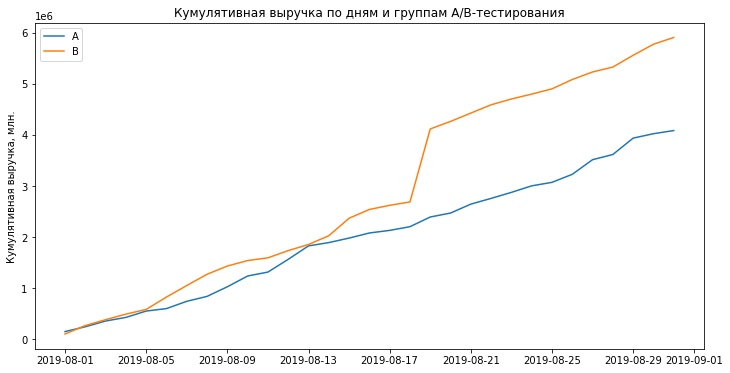

In [20]:
#Построим графики кумулятивной выручки по дням и группам A/B-тестирования
plt.figure(figsize=(12,6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['revenue'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['revenue'], label='B')
plt.title('Кумулятивная выручка по дням и группам A/B-тестирования')
plt.ylabel('Кумулятивная выручка, млн.')
plt.legend();


Выручка в обеих группах растет со временем. На протяжении всего периода проведения теста выручка в группе B превышает аналогичные значения группы A. Однако в группе B наблюдается резкий скачок выручки. Это может быть связано с дорогими товарами в заказах или всплеском количества заказов. Необходимо проверить данные на аномалии. 

### Анализ кумулятивного среднего чека по группам

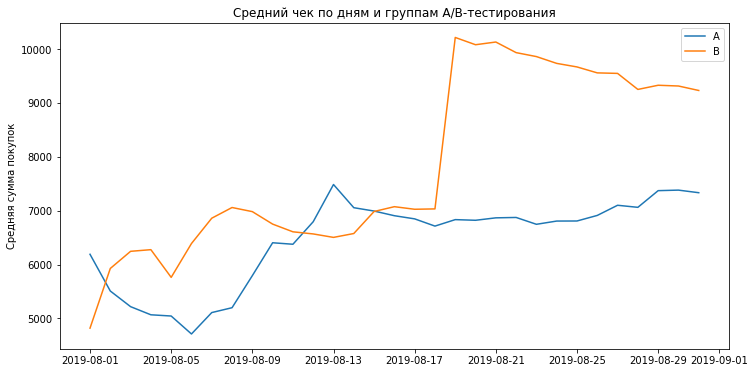

In [21]:
plt.figure(figsize=(12,6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['revenue']/cumulativeDataA['orders'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['revenue']/cumulativeDataB['orders'], label='B')
plt.title('Средний чек по дням и группам A/B-тестирования')
plt.ylabel('Средняя сумма покупок')
plt.legend();


Средний чек в обеих группах становится равномерным ближе к концу периода: для группы A продолжает немного расти, для группы B немного падает. Скорее всего динамика связана с наличием крупных заказов в середине тестирования в группе B (резкий всплеск на графике) и небольшими заказами в группе A в начале тестирования (падение на графике). В этом случае необходимо больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

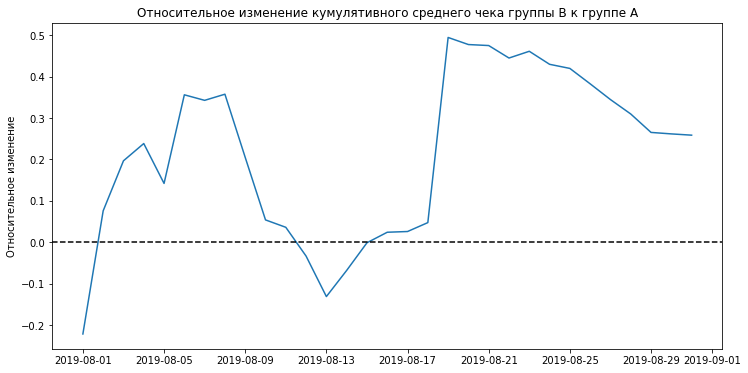

In [22]:
#Построим график относительного изменения кумулятивного среднего чека группы B к группе A
cumulativeDataAB = cumulativeDataA.merge(cumulativeDataB, on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12,6))
plt.plot(cumulativeDataAB['date'], (cumulativeDataAB['revenueB']/cumulativeDataAB['ordersB'])/(cumulativeDataAB['revenueA']/cumulativeDataAB['ordersA'])-1)
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--') 
plt.ylabel('Относительное изменение');

Резкие скачки на графике так же свидетельсвуют о наличии выбросов.

### Анализ кумулятивного среднего количества заказов на посетителя по группам

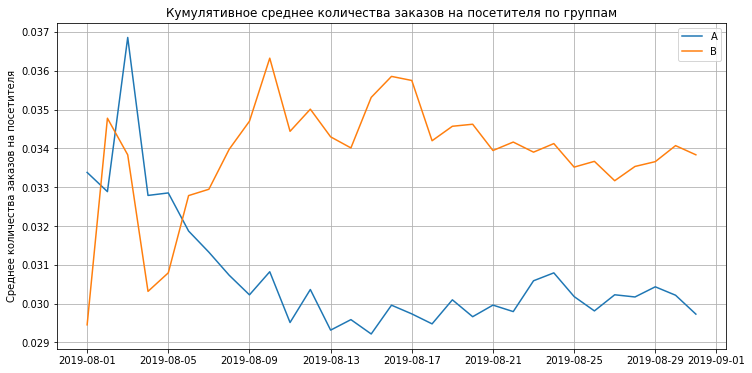

In [23]:
#Построим график кумулятивного среднего количества заказов на посетителя по группам
plt.figure(figsize=(12,6))
plt.plot(cumulativeDataA['date'],cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'],cumulativeDataB['conversion'], label='B')
plt.grid()
plt.title('Кумулятивное среднее количества заказов на посетителя по группам')
plt.ylabel('Cреднее количества заказов на посетителя')
plt.legend();

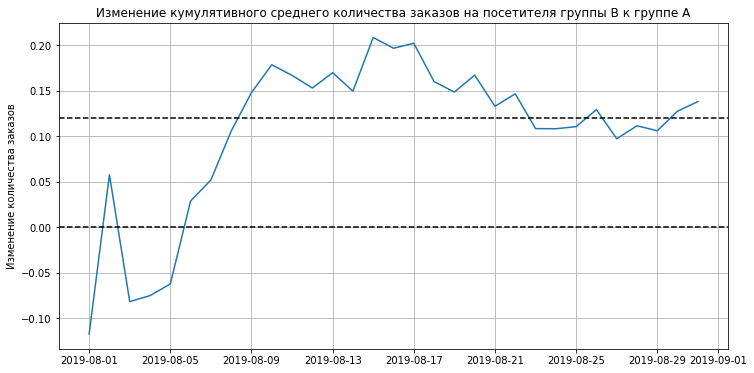

In [24]:
#Построим график изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
plt.figure(figsize=(12,6))
plt.plot(cumulativeDataAB['date'], cumulativeDataAB['conversionB']/cumulativeDataAB['conversionA']-1)
plt.grid()
plt.title('Изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.ylabel('Изменение количества заказов')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.12, color='black', linestyle='--'); 

In [25]:
(cumulativeDataAB['conversionB']/cumulativeDataAB['conversionA']-1).median()

0.12923832937150004

Кумулятивное среднее количество заказов на одного посетителя в группе B стабильно выше, чем в группе A. К концу периода разница установилась на уровне 12-13%. 

### Анализ выбросов

In [26]:
#Построим точечный график количества заказов по пользователям
orders_by_users = orders.groupby('visitorId',as_index=False).agg({'transactionId':'nunique'})
orders_by_users.columns=['visitorId','orders']

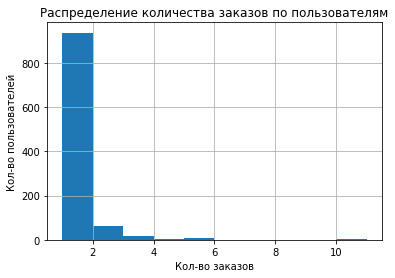

In [27]:
orders_by_users['orders'].hist()
plt.title('Распределение количества заказов по пользователям')
plt.ylabel('Кол-во пользователей')
plt.xlabel('Кол-во заказов');

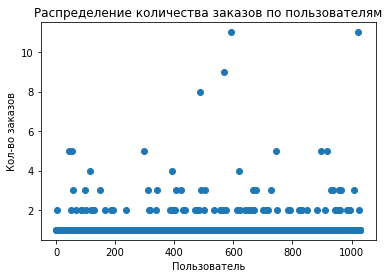

In [28]:
x_values = pd.Series(range(0,len(orders_by_users['orders'])))
plt.scatter(x_values, orders_by_users['orders'])
plt.title('Распределение количества заказов по пользователям')
plt.ylabel('Кол-во заказов')
plt.xlabel('Пользователь');

In [29]:
orders_by_users['orders'].value_counts()

1     937
2      64
3      17
5       6
4       3
11      2
8       1
9       1
Name: orders, dtype: int64

In [30]:
np.percentile(orders_by_users['orders'],[90,95,99])

array([1., 2., 4.])

На графике видно, что есть пользователи, совершившие более 5 заказов. Расчет перцентилей показал, что таких пользователей менее 1% (99% пользователей сделали не более 4 заказов). Отсечем пользователей, совершивших более 5 заказов, как аномальных.

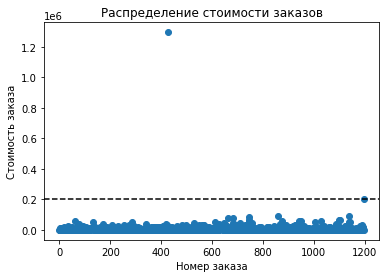

In [31]:
#Построим точечный график стоимостей заказов
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.axhline(y=200000, color='black', linestyle='--')
plt.title('Распределение стоимости заказов')
plt.ylabel('Стоимость заказа')
plt.xlabel('Номер заказа');


In [32]:
#найдем 90, 95, 99 перцентили
np.percentile(orders['revenue'],[90, 95, 99])

array([18168. , 28000. , 58233.2])

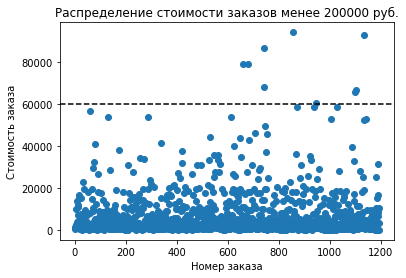

In [33]:
#Построим точечный график стоимостей заказов
orders_norm = orders[orders['revenue']<=200000]['revenue']
x_values = pd.Series(range(0,len(orders_norm)))
plt.scatter(x_values, orders_norm)
plt.axhline(y=60000, color='black', linestyle='--')
plt.title('Распределение стоимости заказов менее 200000 руб.')
plt.ylabel('Стоимость заказа')
plt.xlabel('Номер заказа');

График показывает, что заказов, стоимостью выше 200 000 руб. практически нет. 99% заказов были стоимостью не выше 58 233,2 рублей. При этом не более 5% заказов дороже 28 000 руб. Отбросим аномальные значения свыше 60 000 рублей.

### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя между группами по «сырым» данным — без удаления аномальных пользователей.<br>
Сформулируем гипотезу: различий в среднем количестве заказов между группами нет.<br>
Альтернативная гипотеза: различия в среднем количестве заказов между группами есть.

In [34]:
ordersDailyA = (
    orders.query('group=="A"')[['date', 'transactionId','visitorId','revenue']]
    .groupby('date', as_index=False).agg({'transactionId':'nunique', 'revenue':'sum' })
)
ordersDailyA.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

In [35]:
ordersDailyB = (
    orders.query('group=="B"')[['date', 'transactionId','visitorId','revenue']]
    .groupby('date', as_index=False).agg({'transactionId':'nunique', 'revenue':'sum' })
)
ordersDailyB.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [36]:
visitorsDailyA = visitors.query('group=="A"')[['date', 'visitors']]
visitorsDailyA.columns = ['date', 'visitorsPerDateA']
visitorsDailyB = visitors.query('group=="B"')[['date', 'visitors']]
visitorsDailyB.columns = ['date', 'visitorsPerDateB']


In [37]:
data_for_test = (
    ordersDailyA.merge(ordersDailyB, on='date', how='left')
    .merge(visitorsDailyA, on='date', how='left')
    .merge(visitorsDailyB, on='date', how='left')
    .merge(cumulativeDataAB[['date','revenueA','ordersA', 'visitorsA', 'revenueB','ordersB', 'visitorsB']],
        on='date', how='left')
)


In [38]:
data_for_test.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,visitorsPerDateA,visitorsPerDateB,revenueA,ordersA,visitorsA,revenueB,ordersB,visitorsB
0,2019-08-01,24,148579,21,101217,719,713,148579,24,719,101217,21,713
1,2019-08-02,20,93822,24,165531,619,581,242401,44,1338,266748,45,1294
2,2019-08-03,24,112473,16,114248,507,509,354874,68,1845,380996,61,1803
3,2019-08-04,16,70825,17,108571,717,770,425699,84,2562,489567,78,2573
4,2019-08-05,25,124218,23,92428,756,707,549917,109,3318,581995,101,3280


In [39]:
#посчитаем количество заказов на одного пользователя для тех, кто совершил хотя бы один заказ, по группам
ordersByUsersA = (
    orders.query('group=="A"')
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsersA.columns = ['visitorId', 'orders']
ordersByUsersB = (
    orders.query('group=="B"')
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsersB.columns = ['visitorId', 'orders']

In [40]:
#добавим пользователей, которые ничего не заказали (кол-во заказов 0)
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data_for_test['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data_for_test['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)


In [41]:
#применим критерий Манна-Уитни
print('p-value',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

p-value 0.017


In [42]:
#Выведем относительный прирост среднего числа заказов группы B
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.138


Значение p-value меньше 0,05, следовательно, гипотезу о том, что различий в количестве заказов нет, отвергаем. Наличие различий подтвержадется приростом группы B к группе A.

### Расчет статистической значимости различий в среднем чеке между группами по «сырым» данным.

Сформулируем гипотезу: различий в среднем чеке между группами нет.<br>
Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [43]:
#посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным
print('p-value',"{0:.3f}".format(stats.mannwhitneyu(orders.query('group=="A"')['revenue'],orders.query('group=="B"')['revenue'] )[1]))

p-value 0.729


In [44]:
#Выведем относительный прирост среднего чека заказов группы B по отношению к группе А

print("{0:.3f}".format(orders.query('group=="B"')['revenue'].mean()/orders.query('group=="A"')['revenue'].mean()-1))

0.259


Гипотеза различий в среднем чеке между группами A и B подтверждается. Однако средний чек группы B на 25,9% выше, чем средний чек группы A. Причина, скорее всего, кроется в наличии выбросов

### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. За аномальных пользователей примем тех, кто сделал более 4 заказов или тех, у кого сумма заказа более 60 000 рублей. <br>
Нулевая гипотеза: различий в среднем количестве заказов между группами нет.<br>
Альтернативная гипотеза: различия в среднем количестве заказов между группами есть.

In [45]:
#найдем "аномальных" пользователей
users_many_orders = orders_by_users.query('orders>5')['visitorId']
users_expencive_orders = orders.query('revenue>60000')['visitorId']
abnormal_users = pd.concat([users_many_orders,users_expencive_orders], axis=0).drop_duplicates().sort_values()

In [46]:
abnormal_users.count()

14

In [47]:
sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormal_users))]['orders'],
        pd.Series(0, index=np.arange(data_for_test['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
            name='orders')],
    axis=0,
)
sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormal_users))]['orders'],
        pd.Series(0, index=np.arange(data_for_test['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
            name='orders')],
    axis=0,
)

In [48]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.013
0.155


В результате анализа аномальных значений мы отбросили данные по 14 пользователям, стоимость заказов которых превышала 60000 руб., а количество закзаов было больше 5. Результаты по среднему количеству заказов остались практически теми же. Значение p-value меньше 0,05. Гипотезу о том, что различий в количестве заказов нет, отвергаем. Наличие различий подтвержадется приростом группы B к группе A (15.5% по "очищенным" данным).

### Расчет статистической значимости различий в среднем чеке между группами по «очищенным» данным.

Нулевая гипотеза: различий в среднем чеке между группами нет.<br>
Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [49]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'],
            orders[np.logical_and(orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'])[1]
    )
)

0.814


In [50]:
print("{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'].mean()
        / orders[np.logical_and(orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'].mean() - 1)
) 

0.007


P-value подросло, а разница в среднем чеке близка к 0 и составила 0,7% вместо 25%.

## Вывод

В результате анализа представленных данных можно сказать следуещее:
1. Исходные данные для проведения приоритизации гипотез содержал 9 гипотез по увеличению выручки интернет-магазина с параметрами Reach, Impact, Confidence, Effort.
В результате расчет методом ICE были выявлены 3 наиболее перспективные гипотезы: гипотезы с номером 8 (16 баллов), 0 (13,3 балла) и 7 (11,2 балла).
С учетом параметра, отражающего количество пользователей, которых затронет изменение, наиболее перспективными оказались гипотезы с номерами 7 (112 баллов), 2 (56 баллов), 0 (40 баллов), 6 (40 баллов). Таким образом, учитывая результаты обоих методов оценки наиболее перспективной выглядит гипотеза 7.

2. Данные о результатах A/B тестирования представлены за период с 1 по 31 августа 2019 года. По полученным данным был проведен расчет и анализ кумулятивных показателей выручки, среднего чека, конверсии по тестируемым группам. Проведен анализ "выбросов" и проведена оценка статистической значимости указанных параметров по "сырым" и "очищенным" данным. 
В результате анализа аномальных значений мы отбросили данные по 14 пользователям, стоимость заказов которых превышала 60000 руб., а количество закзаов было больше 5.<br>
Были получены следующие результаты:
2.1. Выручка в обеих группах растет со временем. На протяжении всего периода проведения теста выручка в группе B превышает аналогичные значения группы A. Однако в группе B наблюдается резкий скачок выручки. Что связано с дорогими товарами в заказах или всплеском количества заказов.
2.2. Средний чек в обеих группах становится равномерным ближе к концу периода: для группы A продолжает немного расти, для группы B немного падает. Наблюдается скачок в середине периода в группе B, связанный с аномально большой стоимостью заказа.
2.3. Кумулятивное среднее количество заказов на одного посетителя в группе B стабильно выше, чем в группе A. К концу периода разница установилась на уровне 12-13%. 
3. Анализ сатистической значимости различий в расчитанных показателях между группами показал, что: 
3.1. Гипотеза "различий в среднем количестве заказов между группами нет" не подтвердилась. Как по "сырым", так и по "очищенным" данным значение p-value меньше 0,05. Наличие различий подтвержадется приростом группы B к группе A (15,5% по "очищенным" данным и 13,8% по "сырым" данным).
3.2. Гипотеза "различий между средним чеком по группам нет" подтверждается. Однако, заметим, что средний чек группы B по "сырым" данным был на 25,9% выше, чем средний чек группы A. Причина заключалась в наличии заказов с аномально высокой стоимостью. Корректировка данных на выбросы привела к увеличению p-value и снижению разницы в среднем чеке между группами до 0,7%.<br>

Таким образом, данных достаточно для того, чтобы говорить о "победе" группы B по результатам тестирования и прекратить тест. При отсутствии значимых изменений в среднем чеке, конверсия здесь больше, что приводит к более высоким показателям выручки. 